In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten, Activation
import matplotlib.pyplot as plt
import numpy as np

# Dataset Loading


In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Preprocessing and Normalize pixel values to [0, 1]

In [23]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the 28x28 images into 784-dimensional vectors


In [24]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Convert labels to one-hot encoded format

In [25]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Model Architecture

In [26]:
model = Sequential([
    # Input layer and 1st hidden layer
    Dense(256, input_shape=(784,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    # 2nd hidden layer
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    # 3rd hidden layer
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    # Output layer
    Dense(10, activation='softmax')
])


# Training using "adam" optimizer

In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7315 - loss: 0.8834 - val_accuracy: 0.9547 - val_loss: 0.1617
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9291 - loss: 0.2423 - val_accuracy: 0.9633 - val_loss: 0.1220
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9465 - loss: 0.1763 - val_accuracy: 0.9705 - val_loss: 0.1002
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9546 - loss: 0.1505 - val_accuracy: 0.9726 - val_loss: 0.0893
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9633 - loss: 0.1215 - val_accuracy: 0.9754 - val_loss: 0.0837
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9653 - loss: 0.1162 - val_accuracy: 0.9768 - val_loss: 0.0788
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9680 - loss: 0.1038 - val_accuracy: 0.9761 - val_loss: 0.0780
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9720 - loss: 0.0897 - val_accur

# Training vs. validation accuracy

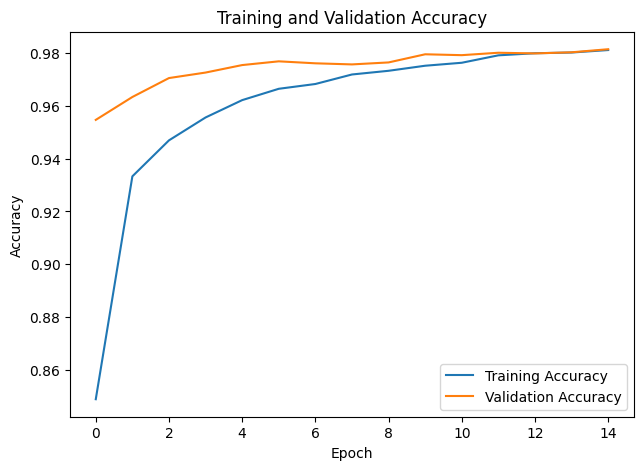

In [38]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Training vs. validation loss

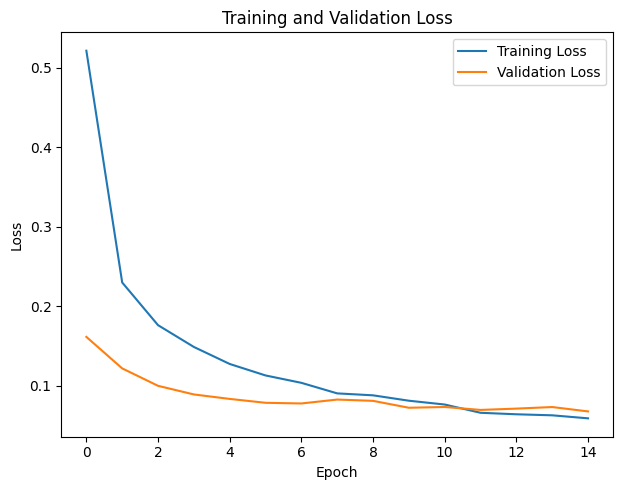

In [42]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation

In [30]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.9816
Test Loss: 0.0643


In [31]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Display a few example predictions

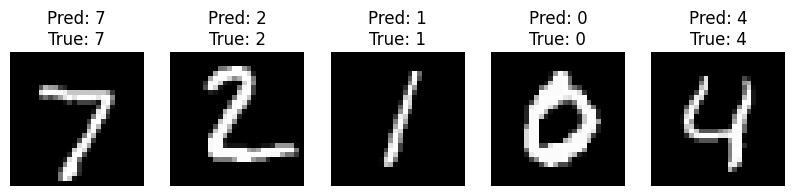

In [32]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {y_pred_classes[i]}\nTrue: {y_test_classes[i]}')
    plt.axis('off')
plt.show()